### 1. Carga de datos:
  * Descarga y carga el dataset «Titanic» desde Kaggle. Realiza una exploración inicial de las variables disponibles, que incluyen información sobre la edad, el género, la clase del pasajero, entre otros.
  * Examina cuántos valores faltan en las variables importantes como la edad y el precio del boleto.

In [1]:
# importamos todas las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, accuracy_score, f1_score
from sklearn.datasets import load_digits
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.inspection import permutation_importance

In [2]:
ruta='../data/titanic.csv'
df = pd.read_csv(filepath_or_buffer=ruta, sep=',')
df.shape

(891, 12)

In [3]:
df.info() # obtenemos informacion del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* PassengerId: Identificador único de cada pasajero. Es un valor numérico y no contiene valores nulos.
* Survived: Indica si el pasajero sobrevivió (1) o no (0) al hundimiento del Titanic. Es una variable binaria de tipo entero.
* Pclass: Clase del pasajero en el barco, representada por un número entero (1, 2, o 3). La clase 1 era para los pasajeros de mayor estatus, mientras que la clase 3 era para los de menor estatus.
* Name: Nombre completo del pasajero. Es un valor de tipo cadena de texto (objeto).
* Sex: Sexo del pasajero, con valores posibles "male" (masculino) o "female" (femenino). Es una variable categórica.
* Age: Edad del pasajero. Es un valor numérico de tipo flotante, pero tiene algunos valores nulos (algunos pasajeros no tienen edad registrada).
* SibSp: Número de hermanos o esposas que viajaban con el pasajero. Es un valor entero.
* Parch: Número de padres o hijos que viajaban con el pasajero. Es un valor entero.
* Ticket: Número del boleto del pasajero. Es una cadena de texto que contiene el número del billete, y no tiene valores nulos.
* Fare: Tarifa pagada por el pasajero por el viaje. Es un valor numérico de tipo flotante.
* Cabin: Número de cabina en la que viajaba el pasajero. Muchos valores están ausentes en este campo, lo que indica que no todos los pasajeros tenían cabina registrada.
* Embarked: Puerto de embarque del pasajero. Puede ser "C" (Cherbourg), "Q" (Queenstown) o "S" (Southampton). Esta columna tiene solo un par de valores nulos.

In [4]:
df.isnull().sum() # verificamos la existencia de valores nuloa

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# contamos valores nulos en cada columna
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Age         177
Cabin       687
Embarked      2
dtype: int64


In [6]:
df.head() # exploramos inicialmente los valores

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.describe().T # mostramos una estadistica descriptiva

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### 2. Exploración y preprocesamiento de datos:
  * Realiza una limpieza de los datos, manejando los valores nulos. Por ejemplo, puedes imputar los valores faltantes de la edad con la mediana o la media según sea conveniente.
  * Revisa la distribución de las variables y asegúrate de que las categorías estén codificadas correctamente para el modelado.

In [8]:
df['Age'].fillna(df['Age'].median(), inplace=True) # utilizamos la mediana de la columna 'Age' para rellenar los valores faltantes en esa columna
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) # utilizamos la moda de la columna 'Embarked' para rellenar los valores faltantes en esa columna
print(df.isnull().sum()) # mostramos el número de valores nulos restantes en cada columna del DataFrame

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


/tmp/ipykernel_16738/1536932162.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True) # utilizamos la mediana de la columna 'Age' para rellenar los valores faltantes en esa columna
/tmp/ipykernel_16738/1536932162.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

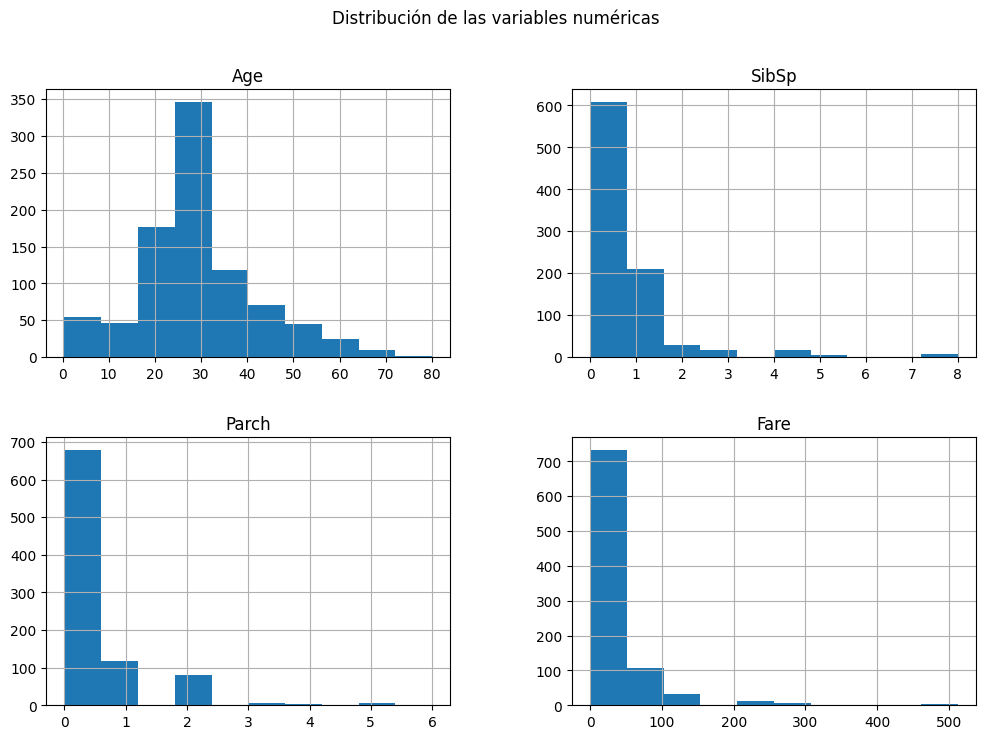

In [9]:
# mostramos estadísticas descriptivas de las columnas 'Age', 'SibSp', 'Parch' y 'Fare'.
df[['Age', 'SibSp', 'Parch', 'Fare']].describe()
df[['Age', 'SibSp', 'Parch', 'Fare']].hist(figsize=(12, 8)) # generamos un histograma de las columnas 'Age', 'SibSp', 'Parch' y 'Fare' para ver la distribución de sus valores
plt.suptitle('Distribución de las variables numéricas') # añadimos un título general para el conjunto de histogramas
plt.show() # mostramos los histogramas

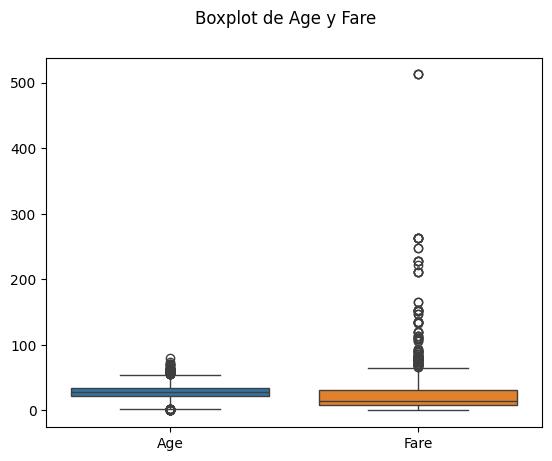

In [10]:
df['Pclass'] = df['Pclass'].astype('category') # convertimos la columna 'Pclass' a tipo 'category'
sns.boxplot(data=df[['Age', 'Fare']]) # generamos un boxplot para visualizar la distribución de 'Age' y 'Fare'
plt.suptitle('Boxplot de Age y Fare') # añadimos un título al boxplot
plt.show() # mostramos el boxplot

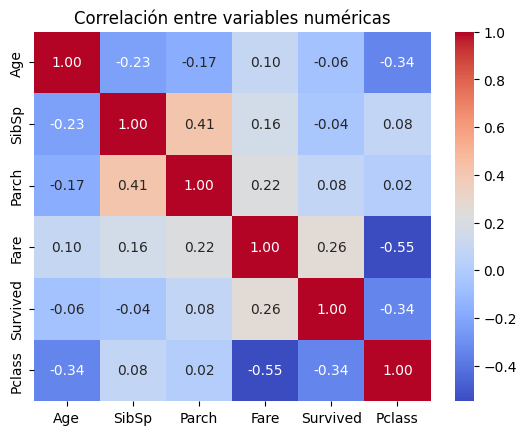

In [11]:
# calculamos la matriz de correlación entre las variables numéricas seleccionadas
correlation_matrix = df[['Age', 'SibSp', 'Parch', 'Fare', 'Survived', 'Pclass']].corr()
# generamos un heatmap para visualizar la matriz de correlación con valores numéricos
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlación entre variables numéricas') # añadimos un título al heatmap
plt.show() # mostramos el heatmap

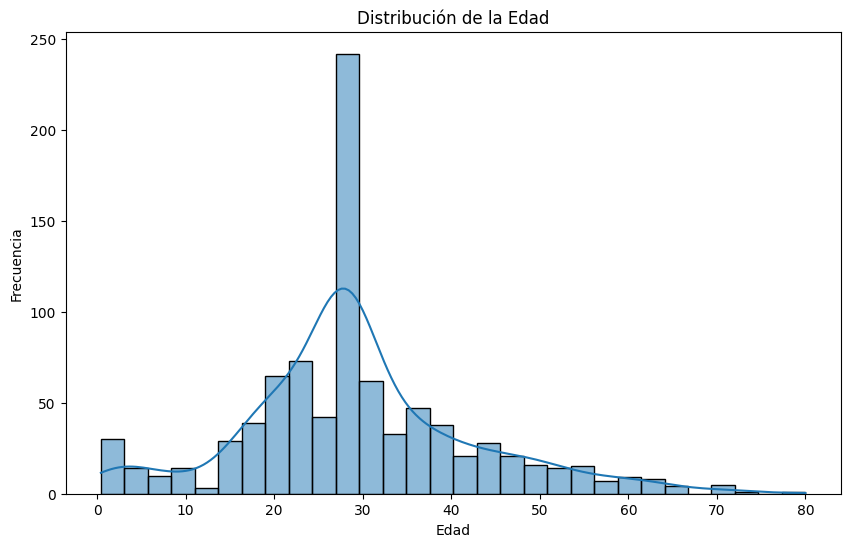

In [12]:
# Histograma para la edad
plt.figure(figsize=(10, 6)) # configuramos el tamaño de la figura para el gráfico
sns.histplot(df['Age'], bins=30, kde=True) # generamos un histograma
plt.title('Distribución de la Edad') # añadimos un título al gráfico
plt.xlabel('Edad') # etiquetamos el eje x con 'Edad'
plt.ylabel('Frecuencia') # etiquetamos el eje y con 'Frecuencia'
plt.show() # mostramos el gráfico

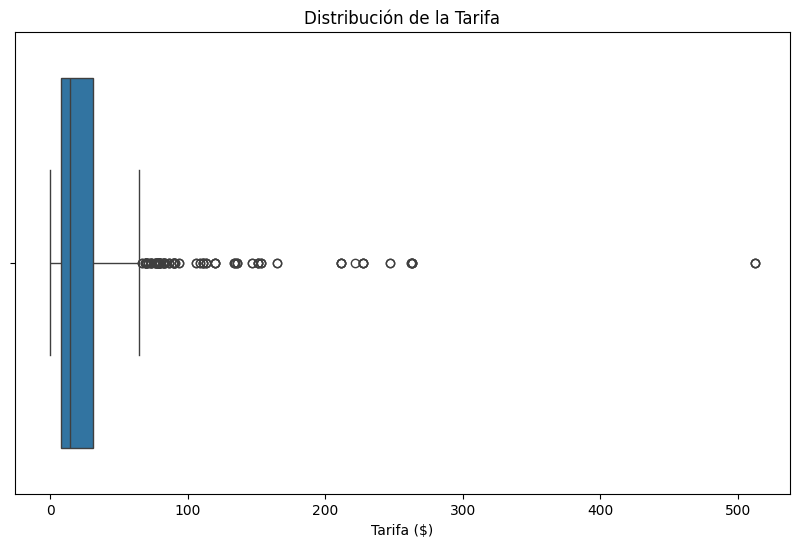

In [13]:
# Boxplot para la tarifa (Fare)
plt.figure(figsize=(10, 6)) # configuramos el tamaño de la figura para el gráfico
sns.boxplot(x='Fare', data=df) # generamos un boxplot
plt.title('Distribución de la Tarifa') # añadimos un título al gráfico
plt.xlabel('Tarifa ($)') # etiquetamos el eje x 
plt.show() # mostramos el gráfico

### 3. Creación de nuevas características:
  * Crea nuevas variables a partir de las existentes. Algunas ideas incluyen:
  * Tamaño de la familia: Combina las variables «SibSp» (número de hermanos/esposos) y «Parch» (número de padres/hijos) para crear una variable que represente el tamaño total de la familia del pasajero.
  * Cabina desconocida: Crea una variable binaria que indique si la cabina de un pasajero es conocida o no, lo cual podría estar relacionado con la clase o la ubicación a bordo.
  * Categoría de tarifa: Agrupa la variable «Fare» en diferentes rangos para crear una variable categórica que represente el nivel de costo del boleto.
  * Título del pasajero: Extrae el título de cada pasajero desde la variable «Name» y crea una nueva variable categórica que represente estos títulos (e.g., Mr., Mrs., Miss.).

In [14]:
# creamos las nuevas columnas
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 
df['CabinKnown'] = df['Cabin'].notnull().astype(int)
df['FareCategory'] = pd.cut(df['Fare'], bins=[0, 10, 20, 50, 100, float('inf')], labels=['Bajo', 'Medio', 'Alto', 'Muy Alto', 'Extremo'])
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [15]:
df.head() # mostramos las priemras columnas para observar las nuevas columnas con su valor

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,CabinKnown,FareCategory,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,Bajo,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1,Muy Alto,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,Bajo,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1,Muy Alto,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,Bajo,Mr


### 4. Evaluación de nuevas características:
  * Aplica un modelo de machine learning (como un modelo de regresión logística o un árbol de decisión) antes y después de agregar las nuevas características para evaluar su impacto en el rendimiento del modelo.
  * Utiliza métricas como la exactitud y el F1-score para comparar el rendimiento con y sin las nuevas variables.

In [16]:
# aplicamos one-hot encoding a las columnas para convertir las variables categóricas en variables numéricas, 
# eliminamos la primera categoría de cada columna, para evitar la multicolinealidad.
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked', 'FareCategory', 'Title'], drop_first=True)
# creamos las matrices X (características) y y (etiquetas).
X = df_encoded.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df_encoded['Survived']
# dividimos el conjunto de datos en entrenamiento y prueba, 80% para entrenamiento y 20% para prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# creamos un modelo de regresión logística con un máximo de 200 iteraciones
model_basic = LogisticRegression(max_iter=200)
# entrenamos el modelo utilizando solo las características seleccionadas ('Age', 'Sex_male', 'Pclass')
model_basic.fit(X_train[['Age', 'Sex_male', 'Pclass']], y_train)
# realizamos predicciones sobre el conjunto de prueba 'X_test' con las mismas características seleccionadas
y_pred_basic = model_basic.predict(X_test[['Age', 'Sex_male', 'Pclass']])
# calculamos la exactitud (accuracy) y el F1-score para evaluar el rendimiento del modelo básico
accuracy_basic = accuracy_score(y_test, y_pred_basic)
f1_basic = f1_score(y_test, y_pred_basic)
# mostramos los resultados: exactitud y F1-score para el modelo básico (sin nuevas características)
print(f'Exactitud sin nuevas características: {accuracy_basic:.4f}, F1-score: {f1_basic:.4f}')

Exactitud sin nuevas características: 0.8101, F1-score: 0.7606


In [18]:
# creamos un modelo de regresión logística con un máximo de 200 iteraciones para el modelo completo
model_full = LogisticRegression(max_iter=200)
# entrenamos el modelo completo utilizando todas las características (todas las columnas de 'X_train')
model_full.fit(X_train, y_train)
# realizamos predicciones sobre el conjunto de prueba X_test
y_pred_full = model_full.predict(X_test)
# calculamos la exactitud (accuracy) y el F1-score para evaluar el rendimiento del modelo completo
accuracy_full = accuracy_score(y_test, y_pred_full)
f1_full = f1_score(y_test, y_pred_full)
# mostramos los resultados: exactitud y F1-score para el modelo completo (con nuevas características)
print(f'Exactitud con nuevas características: {accuracy_full:.4f}, F1-score: {f1_full:.4f}')

Exactitud con nuevas características: 0.8156, F1-score: 0.7785


/home/cvelazquez/anaconda3/envs/ds_mitic/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 5. Interpretación de los resultados:


* El aumento en la exactitud (de 81.01% a 81.56%) sugiere que las nuevas características han contribuido a mejorar ligeramente el rendimiento del modelo en términos de clasificación correcta.
* El incremento en el F1-score (de 0.7606 a 0.7785) indica que las nuevas características no solo han mejorado la exactitud general, sino que también han ayudado a mejorar el equilibrio entre precisión y recuperación, lo cual es crucial para problemas donde las clases están desbalanceadas.
* Los resultados indican una mejora positiva al agregar nuevas características al modelo, lo cual es un buen indicativo de su capacidad predictiva mejorada.
